Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "DziyanaC"

---

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Часть I. Метод Ньютона нахождения корней уравнения.

Напишите алгоритм, который выполняет итерации Ньютона для заданной функции $f(x)$ с известной производной $f'(x)$. Ваша функция должна находить корни $f(x)$ с заданной точностью $\epsilon$.

In [3]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    x_nplus1 = x0
    x_n = x0 + 2 * eps
    i = 0

    while abs(x_nplus1 - x_n) >= eps and i < maxiter:
        x_n = x_nplus1
        x_nplus1 = x_n - f(x_n) / fder(x_n)
        i += 1
    
    x = float(x_nplus1)
    n_iter = i
    return x, n_iter

In [4]:
from numpy.testing import assert_allclose

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=4)
assert_allclose(xx, 1.0, atol=1e-5)
assert nit < 10

xx, nit = newton_iteration(lambda x: x**2 - 1, lambda x: 2.*x, x0=-4)
assert_allclose(xx, -1.0, atol=1e-5)
assert nit < 10


from math import log, exp

xx, nit = newton_iteration(lambda x: exp(x)-2, lambda x: exp(x), x0=4, eps=1e-10)
assert_allclose(xx, log(2), atol=1e-10)

Используя функцию `newton_iteration` для функции $f(x) = x^2 - 1$, постройте зависимость логарифма ошибки нахождения корня методом Ньютона от числа итераций. Какова сходимость метода (линейная, квадратичная, иная)?

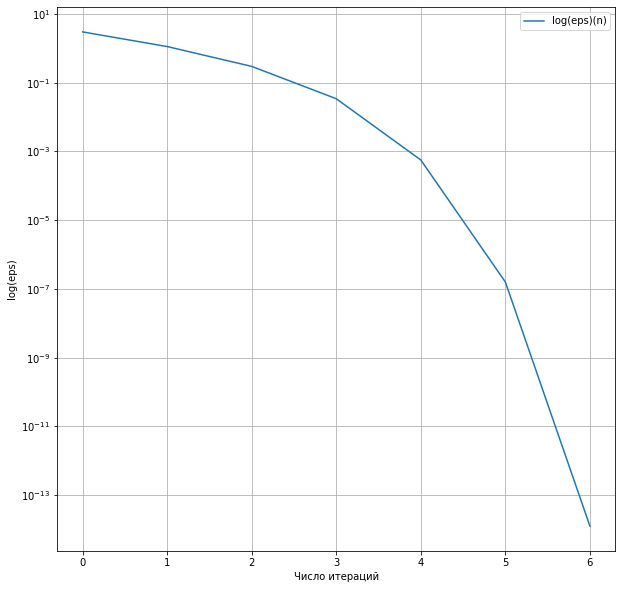

In [14]:
f = lambda x: x**2 - 1
fder = lambda x: 2*x
n = newton_iteration(f, fder, x0=4)[1]
x = []
iterations = []
for i in range(0, n + 1):
  i_x, i_iterations = newton_iteration(f, fder, x0=4, maxiter=i)
  x.append(i_x)
  iterations.append(i_iterations)

plt.figure(figsize=(10, 10))
plt.plot(iterations, np.array(x) - 1, label="log(eps)(n)")
plt.yscale('log')
plt.legend(loc='best')
plt.xlabel("Число итераций")
plt.ylabel("log(eps)")
plt.grid()
plt.show()

# Часть II. Модифицированный метод Ньютона для кратных корней.

Рассмотрим функцию, имеющую кратный корень (например, $f(x) = (x^2 - 1)^2$). Реализуйте модифицированную итерацию Ньютона, 

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

In [15]:
def mod_newton(f, fder, x0, m, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для преcдотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    x_nplus1 = x0
    x_n = x0 + 2 * eps
    i = 0

    while abs(x_nplus1 - x_n) >= eps and i < maxiter:
        x_n = x_nplus1
        x_nplus1 = x_n - m * f(x_n) / fder(x_n)
        i += 1
        
    x = float(x_nplus1)
    n_iter = i
    return x, n_iter

In [16]:
for m in [1, 2, 3, 4, 5, 6]:
    xx, nit = mod_newton(lambda x: (x**2 - 1)**4,
                         lambda x: 4*(x**2 - 1)**3 * 2 * x,
                         x0=2, m=m, maxiter=10000, eps=1e-9)
    assert_allclose(xx, 1.0, atol=1e-8)
    

Используйте модифицированную итерацию Ньютона для функции $f(x) = (x^2 - 1)^2$ со значениями  $m= 1, 2, 3, 4, 5, 6$. Сколько итераций требуется для достижения сходимости с фиксированным значением $\epsilon$? Согласуются ли ваши наблюдения с предсказанием о квадратичной сходимости метода при значении $m$ равном кратности корня, и линейной сходимости для остальных значений $m$?

In [22]:
f = lambda x: (x ** 2 - 1) ** 2
fder = lambda x: 2 * (x ** 2 - 1) * 2 * x
m_list = [1, 2, 3, 4, 5, 6]

for m in m_list:
  x, n = mod_newton(f, fder, x0=2, m=m, maxiter=100000)
  print('Когда значение m =', m, ', для достижения сходимости требуется n =', n, 'итераций.')

Когда значение m = 1 , для достижения сходимости требуется n = 18 итераций.
Когда значение m = 2 , для достижения сходимости требуется n = 5 итераций.
Когда значение m = 3 , для достижения сходимости требуется n = 17 итераций.
Когда значение m = 4 , для достижения сходимости требуется n = 100000 итераций.
Когда значение m = 5 , для достижения сходимости требуется n = 100000 итераций.
Когда значение m = 6 , для достижения сходимости требуется n = 100000 итераций.


Заметим, что минимальное количестово итераций требуется для m = 2, в этом случае значение m совпадает с кратностью корня f(x) = 0. При этом сходимость метода является квадратичной, а в иных случаях линейной.
Для m = 4, 5, 6 программа не дает ответ, так как требуется больше итераций, чем установленный максимум в программе, однако для m = 4 увеличение максимума даже в 100 раз не помогло получить ответ.

# Part III. Newton's fractal.

(4 дополнительных балла)

Consider the equation
$$ x^3 = 1 $$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the **{basins of attraction}** of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. Color the grid in three colors, according to the root, to which iterations converged.


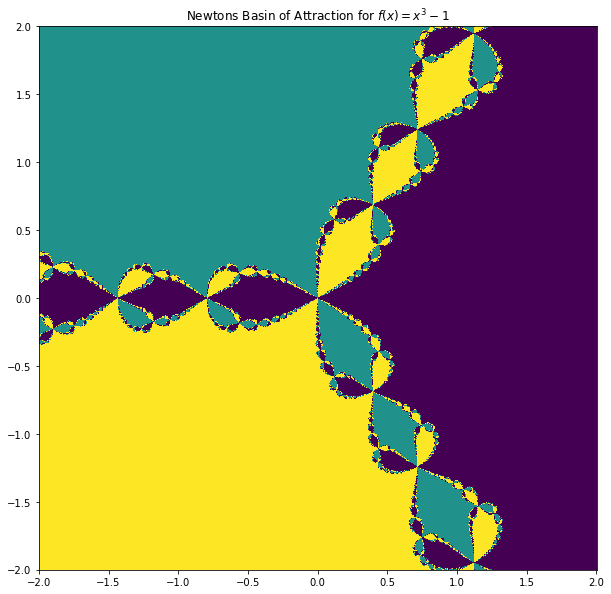

In [26]:
def newton_iteration_complex(f, fder, x0, eps=1e-5, maxiter=100):
    x_nplus1 = x0
    x_n = x0 + 2 * complex(eps, eps)
    i = 0

    while abs(x_nplus1 - x_n) >= eps and i < maxiter:
        x_n = x_nplus1
        x_nplus1 = x_n - f(x_n) / fder(x_n)
        i += 1
    
    x = float(x_nplus1)
    n_iter = i
    return x, n_iter


roots = np.exp(np.arange(0, 3) * 2 * np.pi * 1j / 3)
initialReal = np.linspace(-2, 2, 1000)
initialImag = np.linspace(-2, 2, 1000)

XR, YR = np.meshgrid(initialReal,initialImag)
initial = XR + 1j * YR
results = np.zeros_like(initial, dtype=float)

f = lambda x: x ** 3 - 1
fder = lambda x: 3 * x ** 2

for i in range(results.shape[0]):
    for j in range(results.shape[1]):
        find_root = abs(roots - complex_nwet(f, fder, initial[i,j], maxiter=20)[0])
        results[i, j] = np.argmin(find_root)

plt.figure(figsize=(10, 10))
plt.title(r'Newtons Basin of Attraction for $f(x) = x^3 - 1$')
h = plt.pcolormesh(XR, YR, results)
plt.show()

# Часть IV. Метод Ньютона для системы нелинейных уравнений.

Напишите алгоритм, который выполняет итерации Ньютона для заданной системы нелинейных уравнений $\vec{f}(x) = 0$ с известной матрицей Якоби $J(x)$. Ваша функция должна находить корни вектор-функции $\vec{f}(x)$ с заданной точностью $\epsilon$.

In [ ]:
def newton_system(F, jcb, X0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    F : callable
        Вектор-функция системы, которую мы хотим решить.
    jcb : callable
        Якобиан `f`.
    X0 : array-like of floats, shape (n,)
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    X : array-like of floats, shape (n,)
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    x_nplus1 = X0
    x_n = X0 + 2 * eps
    i = 0

    while np.linalg.norm(x_nplus1 - x_n) >= eps and i < maxiter:
        x_n = x_nplus1
        x_nplus1 = x_n + solve(jcb(x_n), -F(x_n))
        i += 1
    X = x_nplus1
    n_iter = i
    return X, niter

In [ ]:
from numpy.testing import assert_allclose

def func(X):
    return np.array([X[0]**2 - 2*X[1]**4 + 1,
                     X[0] - X[1]**3 + 1])

def jac(X):
    return np.array([[2.*X[0], -8.*X[1]**3],
                     [1., -3.*X[1]**2]])

xx, nit = newton_system(func, jac, np.array([3., 2.]))
assert_allclose(xx, np.array([4.02879487, 1.71325223]), atol=1e-5)
assert nit < 10

xx, nit = newton_system(func, jac, np.asarray([1., 2.]))
assert_allclose(xx, np.asarray([-0.35119943,  0.86570596]), atol=1e-5)
assert nit < 10

Напишите функцию, возвращающую матрицу якобиана функции трех переменных `func2`:

In [ ]:
def func2(X):
    x, y, z = X
    return np.array([x**2 + y**2 + z**2 - 25,
                     x*y + y*z + z*x - 5,
                     x + y - 3])

def jac2(X):
    r"""Return the Jacobian of `func2(X)`.
    
    
    The Jacobian matrix is defined as 
    
    $$
    J_{ij} = \partial f_i / \partial x_j
    $$
    
    so that the first row contains the derivatives of $f_0$
    with respect to the first, second etc coordinates; the second
    row contains the derivatives of $f_1$ with respect to
    the first, second etc coordinates; and so on.
    """
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
X = [1, 2, 3]
assert jac2(X).shape == (3, 3)


In [ ]:
# more testing in this cell, keep it intact
